# Practice Project - 1

# World Happiness Report

<b>Problem Statement:</b>

<b>Context</b>

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

<b>What is Dystopia?</b>

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

<b>What are the residuals?</b>

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

<b>What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?</b>

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.sample(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
53,Kazakhstan,Central and Eastern Europe,54,5.855,0.04114,1.12254,1.12241,0.64368,0.51649,0.08454,0.11827,2.24729
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674


In [6]:
type(df.columns)

pandas.core.indexes.base.Index

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Here, we get the total number of null values present in any particular column

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
# Here, we are finding out the total number of null values in our complete dataset

df.isnull().sum().sum()

0

In [11]:
# There are no duplicate columns in our dataset

df.drop_duplicates()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<b>Let's find out if outliers are present by using scatter plot</b>

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

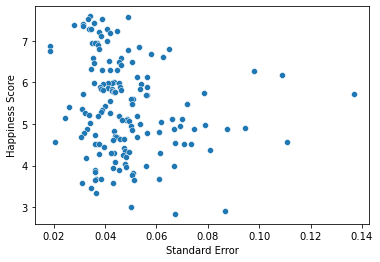

In [12]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

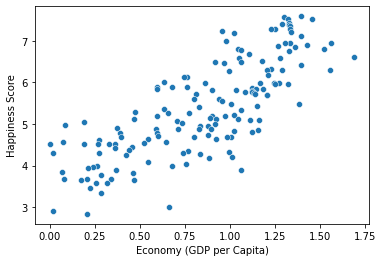

In [13]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

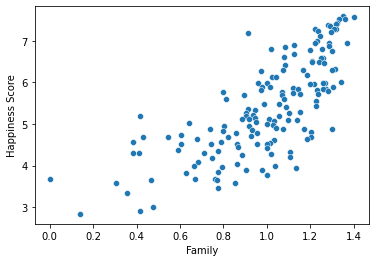

In [14]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

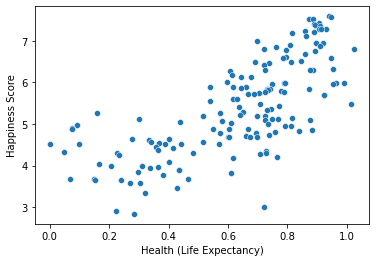

In [15]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

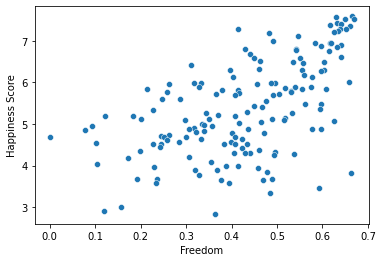

In [16]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

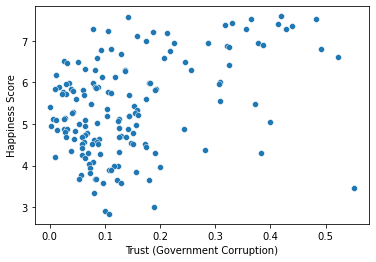

In [17]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

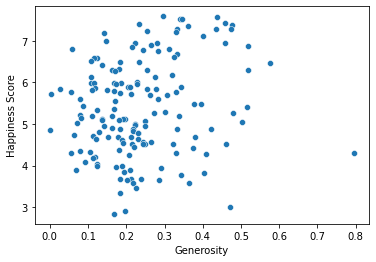

In [18]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

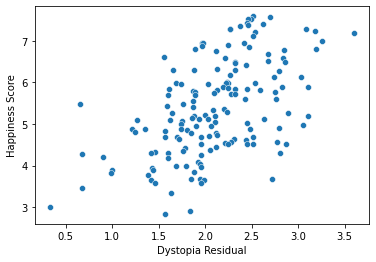

In [19]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)

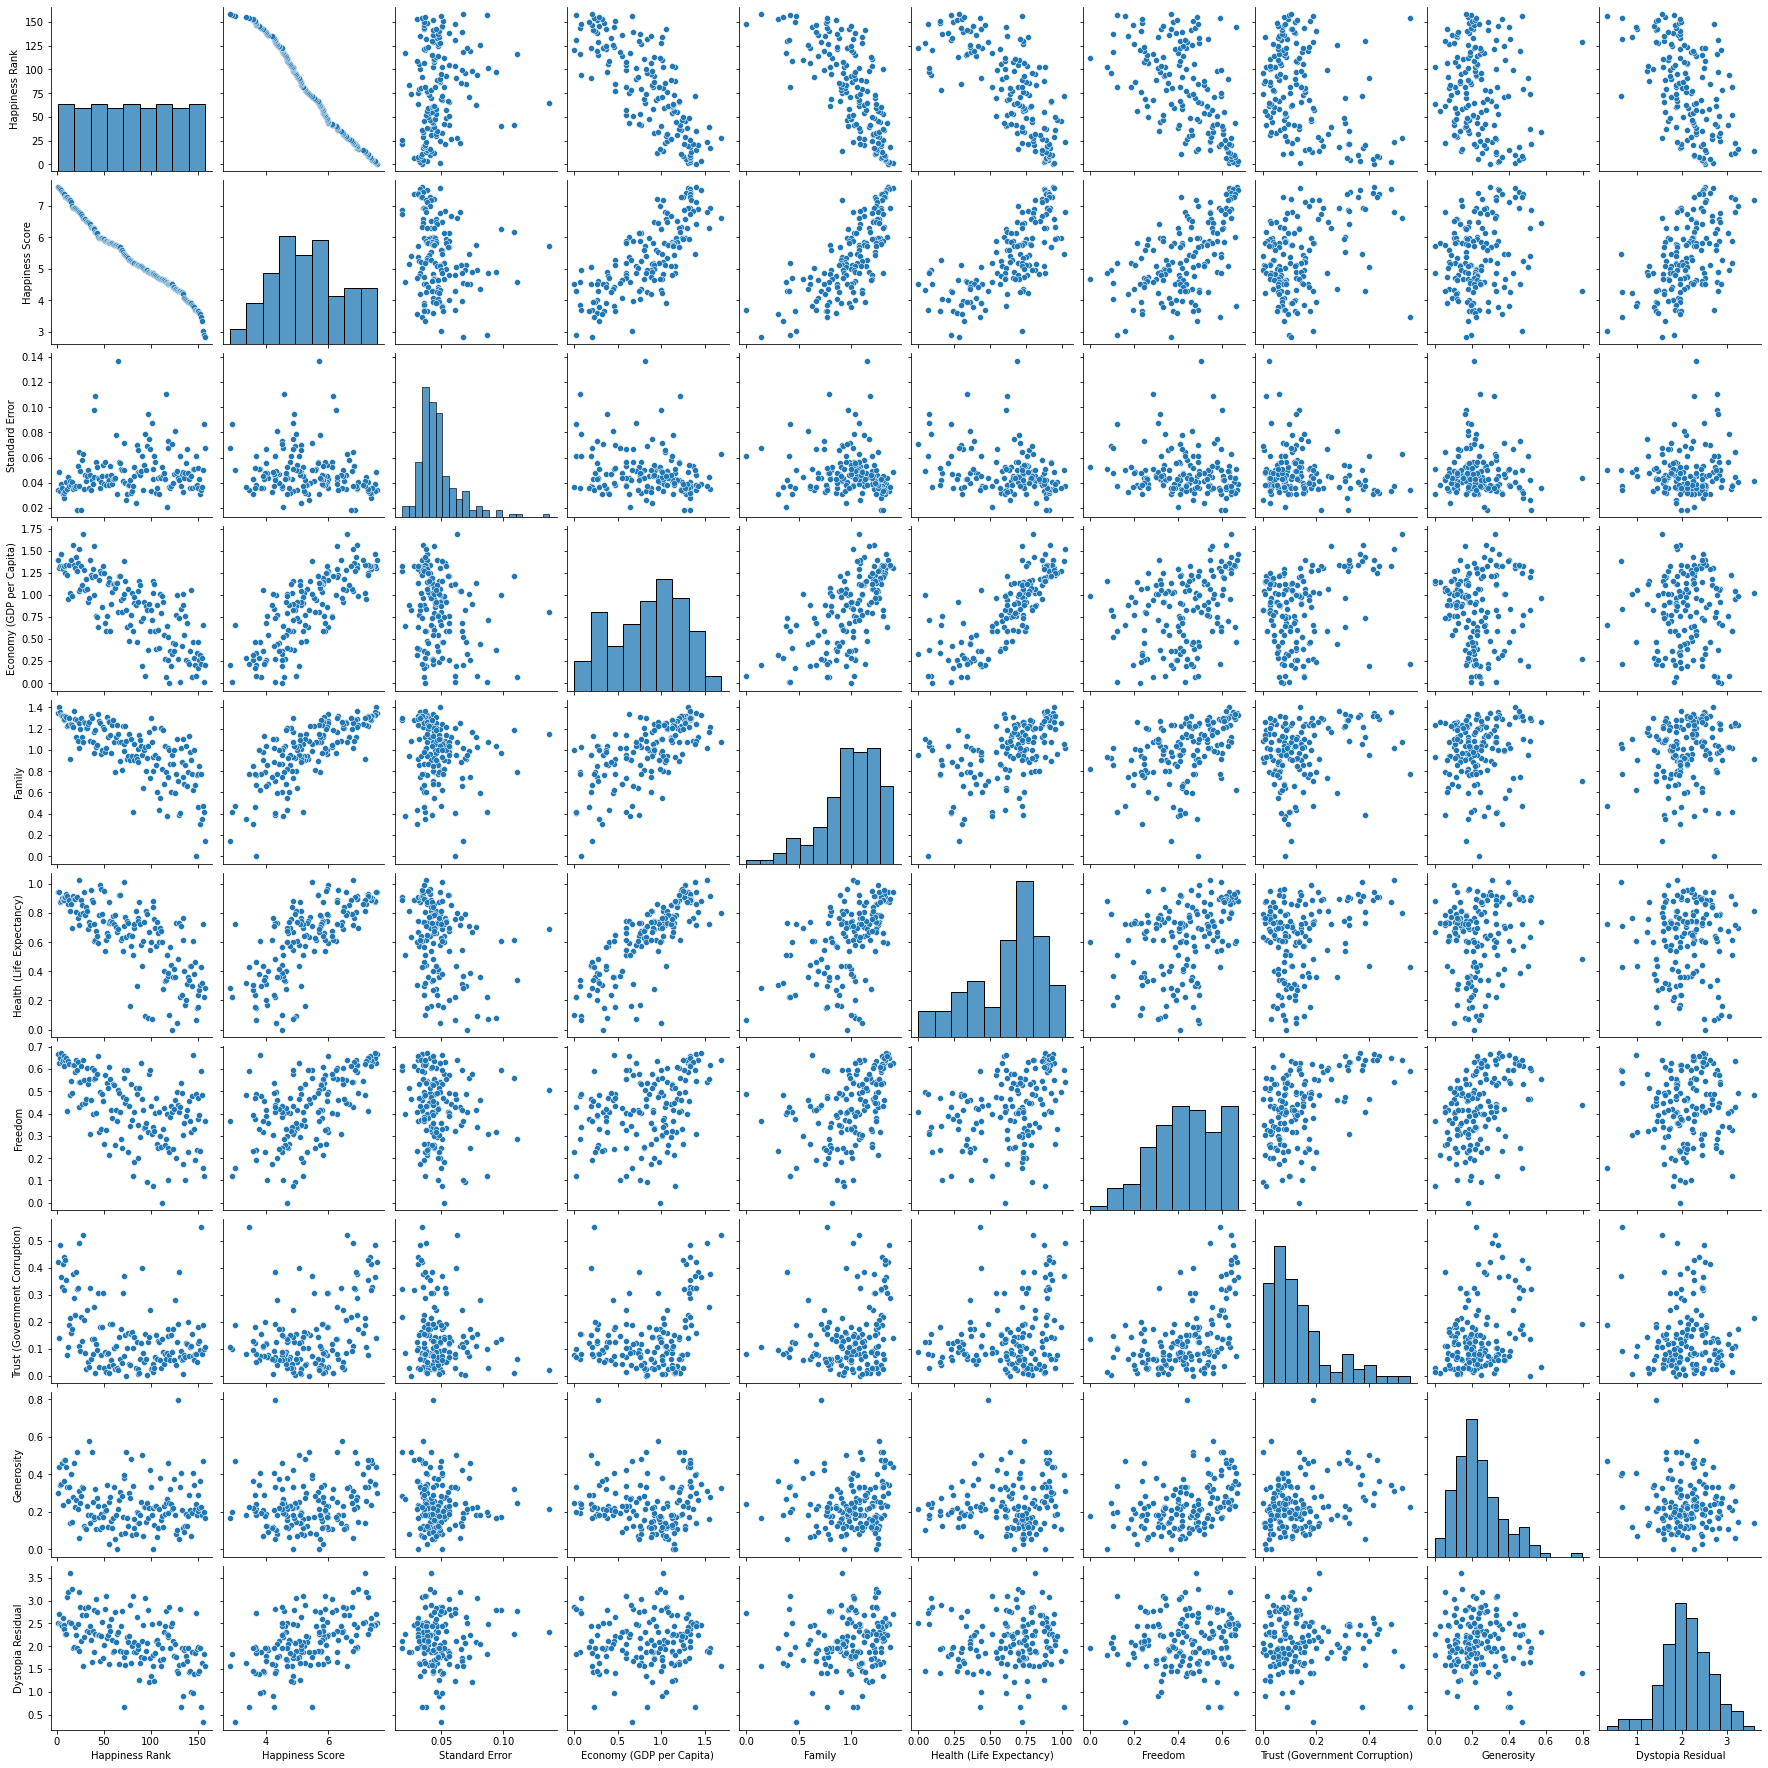

In [20]:
# Let's use pair plot to identify the common distribution of the datasets

sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

In [21]:
# Let's drop the columns that have no contribution in the prediction of output

dfnew = df.iloc[:,3:12]
dfnew

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<b>Correlation</b>

In [22]:
dfnew.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [23]:
dfnew.corr()['Happiness Score'].sort_values()

Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<b>Correlation using heatmap</b>

<AxesSubplot:>

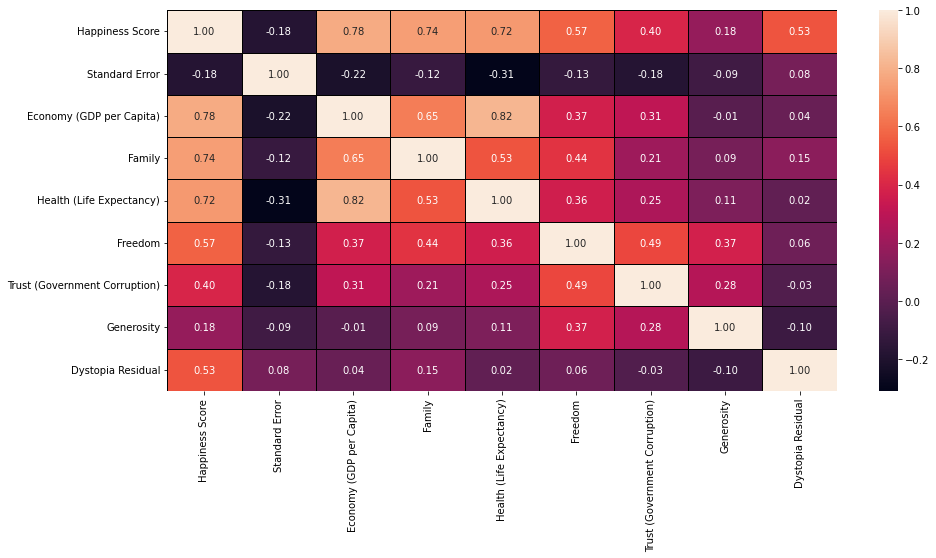

In [24]:
plt.figure(figsize=(15, 7))
sns.heatmap(dfnew.corr(), annot=True, linewidth=0.5, linecolor="black", fmt = '.2f')

<b>Outcome of Correlation:</b>

* Standard error is negatively correlated to Happiness Score.         
* Economy(GDP per Capita) is 78% correlated to Happiness Score, which is a good relation.      
* Family is 74% correlated to Happiness Score, which is a good relation.
* Health is 72% correlated to Happiness Score, which is a good relation.
* Freedom is 57% correlated to Happiness Score, which is a good relation
* Trust(Government Corruption) is 40% correlated to Happiness Score, which is medium relation.
* Generosity is 18% correlated to Happiness Score, which is not that good relation.
* Dystopia Residual is 0.53% correlated to Happiness Score, which is a weak relation.          

* Maximum correlation: Economy
* Minimum correlation: Generosity
* Negative correlation: Standard error

<b>Descriptive Statistics</b>

In [25]:
dfnew.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [26]:
# Here, we are taking out "count()", because count of every column is equal,
# and it will not help in our analysis.

dfnew.describe()[1:]

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [27]:
dfnew.describe()[1:].transpose()

,mean,std,min,25%,50%,75%,max
Happiness Score,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [28]:
round(dfnew.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
Happiness Score,5.38,1.15,2.84,4.53,5.23,6.24,7.59
Standard Error,0.05,0.02,0.02,0.04,0.04,0.05,0.14
Economy (GDP per Capita),0.85,0.40,0.00,0.55,0.91,1.16,1.69
Family,0.99,0.27,0.00,0.86,1.03,1.21,1.40
Health (Life Expectancy),0.63,0.25,0.00,0.44,0.70,0.81,1.03
Freedom,0.43,0.15,0.00,0.33,0.44,0.55,0.67
Trust (Government Corruption),0.14,0.12,0.00,0.06,0.11,0.18,0.55
Generosity,0.24,0.13,0.00,0.15,0.22,0.31,0.80
Dystopia Residual,2.10,0.55,0.33,1.76,2.10,2.46,3.60


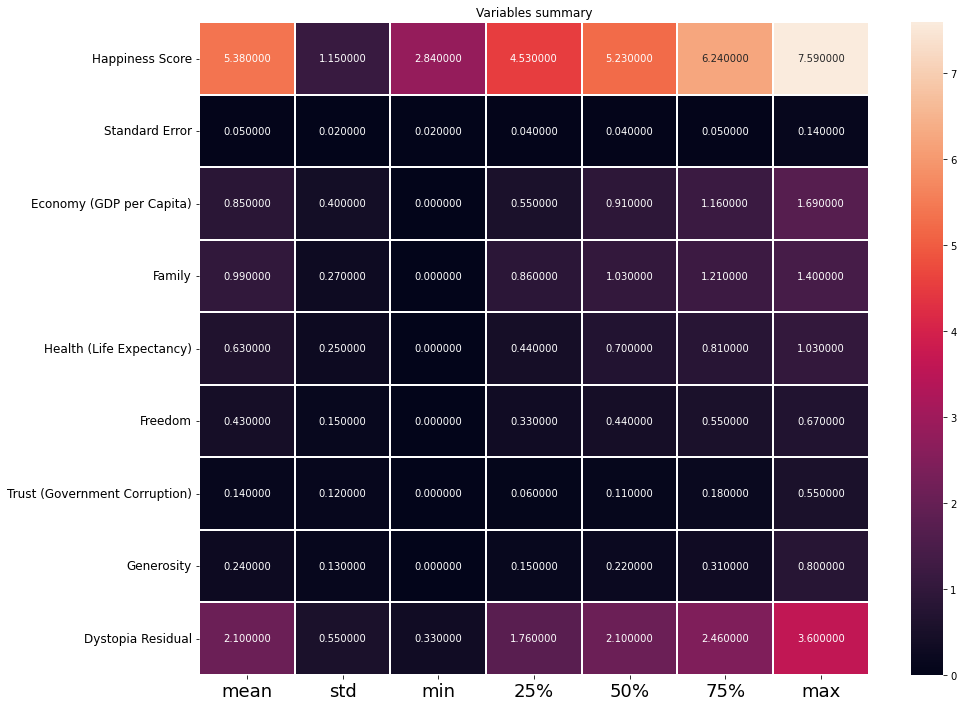

In [29]:
# Let's plot the heatmap of the describe function, that we have calculated.
# Here, we are passing the output that we got by using the "describe()"" function earlier, as an input to the heatmap.


plt.figure(figsize=(15,12))
sns.heatmap(round(dfnew.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.savefig('heatmap.png')
plt.show()

<b>Outcome of describe of datasets:</b>

From the above plotting, we are determining mean, standard deviation, minimum and maximum value of each column. it helps further in data cleaning.

Total number of rows in the dataset:

1. 158 rows
2. 9 columns

Standard Error:

1. mean= 0.05
2. std=  0.02
3. min =  0.02
4. max=  0.14

Economy (GDP per Capita):

1. mean= 0.85
2. std=  0.4
3. min=  0.00
4. max=  1.69

Family:

1. mean= 0.99
2. std=  0.27
3. min=  0.00
4. max=  1.4

Health (Life Expectancy):

1. mean= 0.63
2. std=  0.25
3. min=  0.00
4. max=  1.03

Freedom:

1. mean= 0.43
2. std=  0.15
3. min=  0.00
4. max=  0.67

Trust (Government Corruption):

1. mean= 0.14
2. std=  0.12
3. min=  0.00
4. max=  0.55

Generosity:

1. mean= 0.24
2. std=  0.13
3. min=  0.00
4. max=  0.8

Dystopia Residual:

1. mean= 2.1
2. std=  0.55
3. min=  0.33
4. max=  3.6

In [30]:
# Here, we are checking the basic info of our dataset.
# It is used to get an idea about the datatypes of each of the columns, and memory used by the dataframe.

dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [31]:
collist = df.columns.values
ncol = 30
nrows = 16

In [32]:
collist

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

In [33]:
dfnew.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<b>Outcome of skewness:</b>

Skewness threshold is taken as +/-0.65           

Columns which are having skewness:            

* Standard Error          
* Family           
* Health (Life Expectancy)               
* Trust (Government Corruption)
* Generosity

# Normal Distribution Curve

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

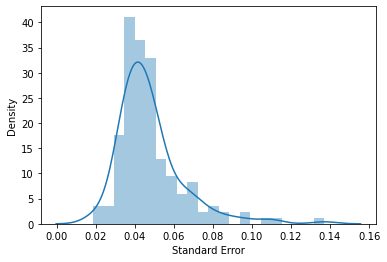

In [34]:
sns.distplot(dfnew["Standard Error"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

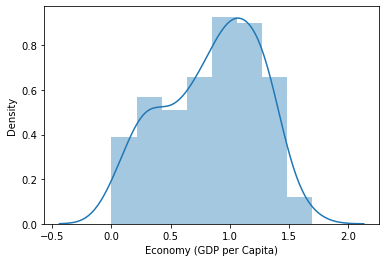

In [35]:
sns.distplot(dfnew["Economy (GDP per Capita)"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='Family', ylabel='Density'>

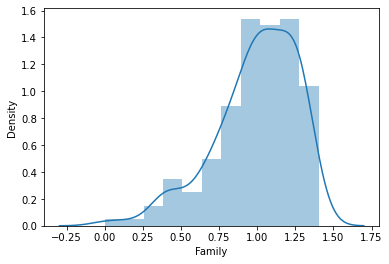

In [36]:
sns.distplot(dfnew["Family"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

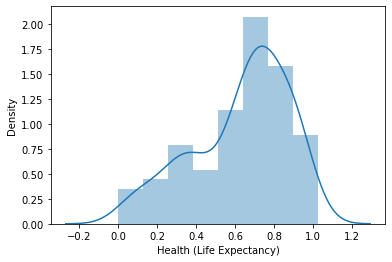

In [37]:
sns.distplot(dfnew["Health (Life Expectancy)"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

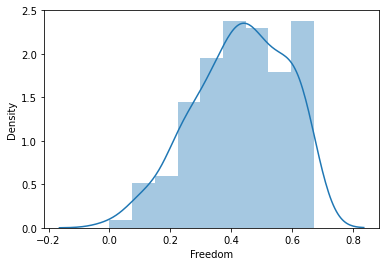

In [38]:
sns.distplot(dfnew["Freedom"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

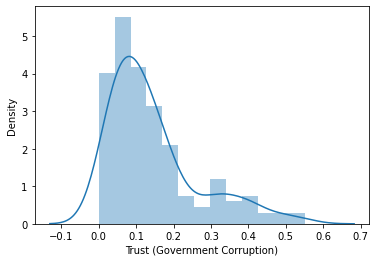

In [39]:
sns.distplot(dfnew["Trust (Government Corruption)"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

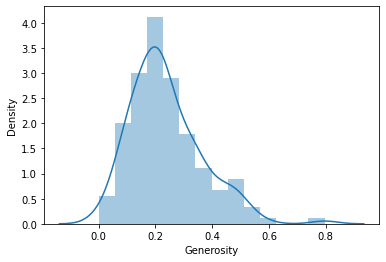

In [40]:
sns.distplot(dfnew["Generosity"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

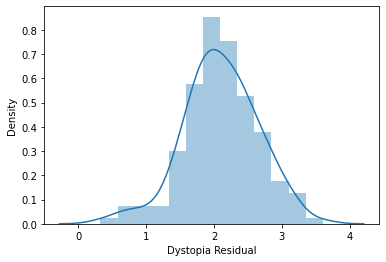

In [41]:
sns.distplot(dfnew["Dystopia Residual"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<b>The normal distribution curve of "Happiness Score" is irrelevant.</b>

<b>The normal distribution shows that the data is skewed.</b>

# Data Cleaning

In [42]:
dfnew.corr()['Happiness Score'].sort_values()

Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

In [43]:
delete = pd.DataFrame([["-0.177254", "Standard Error", "No", "Alot"]],
                     columns = ["Correlation with Target", "Column Name", "Normalized", "Outliers"])

delete

,Correlation with Target,Column Name,Normalized,Outliers
0,-0.177254,Standard Error,No,Alot


In [44]:
df = dfnew.drop(["Standard Error"], axis=1)

In [45]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Removing Outliers

In [46]:
from scipy.stats import zscore

In [47]:
zscore(df)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,-1.674055,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.783571,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,-2.076199,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-2.164688,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [48]:
np.abs(zscore(df))

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [49]:
z = np.abs(zscore(df))
z.shape

(158, 8)

In [50]:
type(z)

pandas.core.frame.DataFrame

In [51]:
# Here, we are getting the index numbers of the datapoints, where zscore is greater than 3

np.where(z>3)

(array([ 27, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 6, 2, 5, 7, 2], dtype=int64))

In [52]:
len(np.where(z>3)[0])

6

In [53]:
df_new = df[(z<3).all(axis=1)]

In [54]:
print("Old DataFrame", df.shape)
print("New DataFrame", df_new.shape)
print("total_dropped_rows", df.shape[0] - df_new.shape[0])

Old DataFrame (158, 8)
New DataFrame (152, 8)
total_dropped_rows 6


# Percentage Data Loss

In [55]:
loss_percent = (158-152)/158*100
print(loss_percent, '%')

3.79746835443038 %


<b>Now, let's check how much outliers are still there, and if the outliers are there, whether they help in testing the model or not.</b>

<b>Model without outliers is df and model with desired outliers is df_new</b>

In [56]:
# As we can see from the output, the number of rows has decreases from 158 to 152,
# i.e., 52 rows have been dropped.


df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# Separate the data

In [57]:
x = df_new.iloc[:,1:9]

x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [58]:
y=df_new.iloc[:,-8]

y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

# Transforming data to remove skewness

In [59]:
from sklearn.preprocessing import power_transform

In [60]:
x = power_transform(x, method='yeo-johnson')

In [61]:
type(x)

numpy.ndarray

In [62]:
x

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [63]:
x.ndim

2

In [64]:
# Let's check the mean of the complete data.
# As we an see from the output below, the mean is 2.39

x.mean()

4.674623261579606e-17

<b>If we round-off the mean to 17 decimal places, then mean will be zero.</b>

In [65]:
x.std()

1.0

# Since target column has continuous variable we will use linear classification model.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [68]:
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)
        print('*'*60,'\n')

At random state 35  The model performs very well
At random_state:- 35
Training r2_score is:- 99.41941493759124
Testing r2_score is:- 99.41805428234099
************************************************************ 

At random state 84  The model performs very well
At random_state:- 84
Training r2_score is:- 99.42535555613838
Testing r2_score is:- 99.42580861284178
************************************************************ 

At random state 95  The model performs very well
At random_state:- 95
Training r2_score is:- 99.41878844708879
Testing r2_score is:- 99.4245221915696
************************************************************ 

At random state 213  The model performs very well
At random_state:- 213
Training r2_score is:- 99.41702291183927
Testing r2_score is:- 99.42000214077392
************************************************************ 

At random state 251  The model performs very well
At random_state:- 251
Training r2_score is:- 99.42334166617816
Testing r2_score is:- 99.42299

In [69]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=.20, random_state=80)

<b>By carrying out cross validation, we found out that, the training score and testing score is same at random state 80. This means that at random state 80, model performance is optimum.</b>

In [70]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)*100

99.4631099105855

In [71]:
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Mean Absolute Error: 0.059483587979181816
Mean Squared Error: 0.0048227478361071155
Root Mean Square Error: 0.06944600662462252


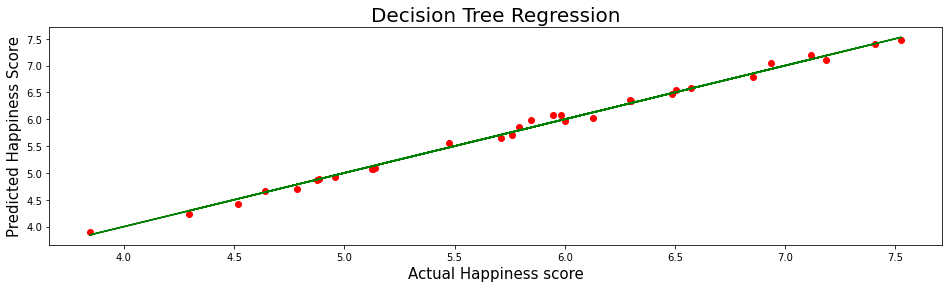

In [72]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='g')

plt.xlabel('Actual Happiness score',fontsize=15)
plt.ylabel('Predicted Happiness Score',fontsize=15)
plt.title('Decision Tree Regression',fontsize=20)
plt.show()

<b>As the model fits well, there is no need of regularization.</b>

# Ensemble Techniques

<b>Decision Tree Regressor</b>

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [74]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'random'}


In [75]:
dt = DecisionTreeRegressor(criterion='mae', splitter='best')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=2)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 61.73664194317815
Cross Val Score: -455.8137504770613


In [76]:
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))

Mean Absolute Error: 0.44341935483870965
Mean Squared Error: 0.34371006451612907
Root Mean Square Error: 0.5862679118936402


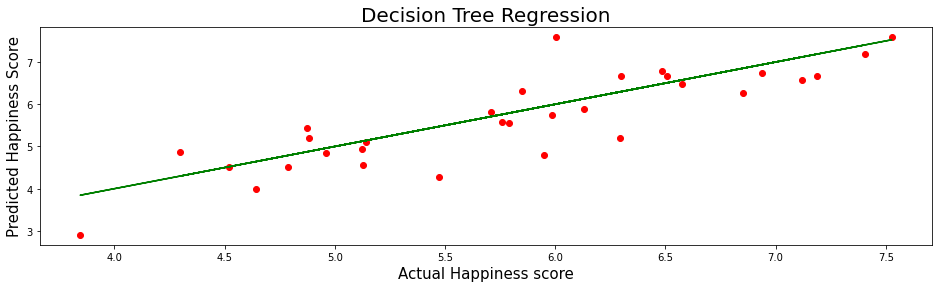

In [77]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='g')

plt.xlabel('Actual Happiness score',fontsize=15)
plt.ylabel('Predicted Happiness Score',fontsize=15)
plt.title('Decision Tree Regression',fontsize=20)
plt.show()

<b>Random Forest Regressor</b>

In [78]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 200}


In [79]:
rf = RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)

rfs = r2_score(ytest,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=4)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 90.80630865022013
Cross Val Score: -374.16000625703475


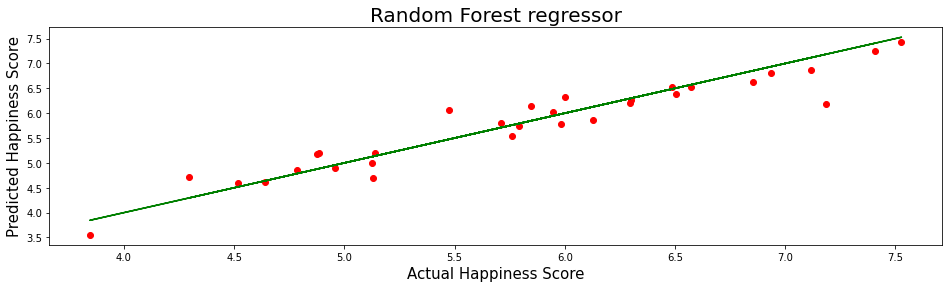

In [80]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='g')
plt.xlabel('Actual Happiness Score',fontsize=15)
plt.ylabel('Predicted Happiness Score',fontsize=15)
plt.title('Random Forest regressor',fontsize=20)
plt.show()

<b>Gradient Boosting Regressor</b>

In [81]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'lad', 'n_estimators': 200}


In [82]:
gbr= GradientBoostingRegressor(criterion='mse',loss='lad',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_random = gbr.predict(xtest)

gbrs= r2_score(ytest,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=2)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 92.79912239523368
Cross Val Score: -360.2328909563489


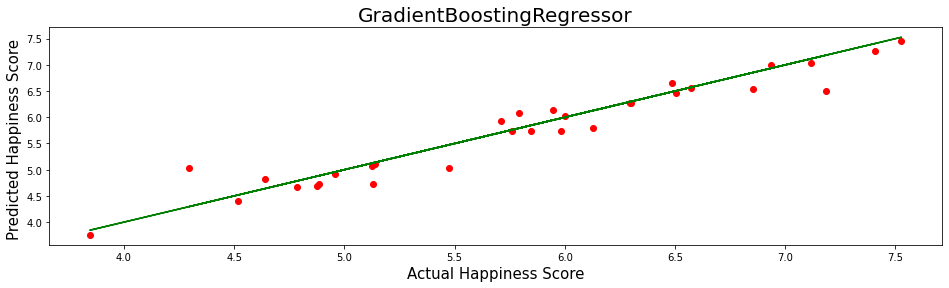

In [83]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='g')
plt.xlabel('Actual Happiness Score',fontsize=15)
plt.ylabel('Predicted Happiness Score ',fontsize=15)
plt.title('GradientBoostingRegressor',fontsize=20)
plt.show()

<b>Support Vector Regressor</b>

In [84]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale']}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'gamma': 'auto', 'kernel': 'linear'}


In [85]:
sv = SVR(kernel = 'linear', gamma = 'auto')
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

svs = r2_score(ytest,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=3)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 99.38813734187761
Cross Val Score: 90.36728840299922


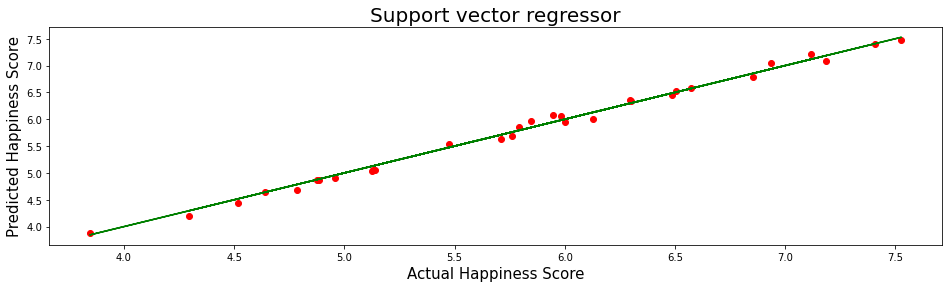

In [86]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='g')
plt.xlabel('Actual Happiness Score',fontsize=15)
plt.ylabel('Predicted Happiness Score',fontsize=15)
plt.title('Support vector regressor',fontsize=20)
plt.show()

<b>K Neighbors Regressor</b>

In [87]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'auto', 'weights': 'distance'}


In [88]:
kn = KNeighborsRegressor(algorithm = 'auto', weights = 'distance')
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

kns = r2_score(ytest,pred_vector)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=10)
kvc = knscore.mean() 
print('Cross Val Score:',kvc*2)

R2 Score: 99.38813734187761
Cross Val Score: -22.187502272403645


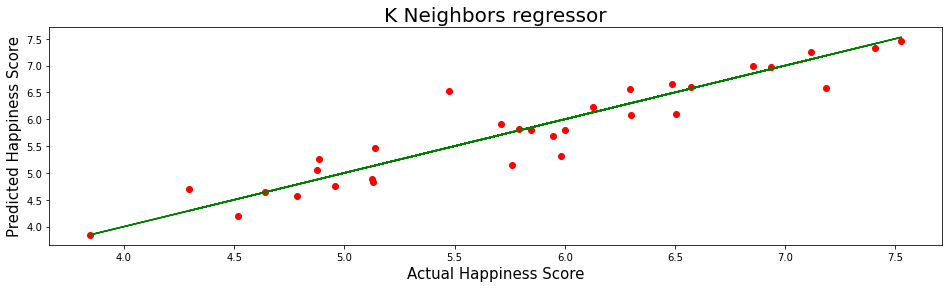

In [89]:
plt.figure(figsize=(16,4))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='g')
plt.xlabel('Actual Happiness Score',fontsize=15)
plt.ylabel('Predicted Happiness Score',fontsize=15)
plt.title('K Neighbors regressor',fontsize=20)
plt.show()

<b>Thus, we can conclude that the best model is Linear Regressor, as the difference between the percentage score of cross validation and r2_score is optimum.</b>

# Model Saving

In [90]:
import pickle

filename='World-Happiness-Score.pkl'
pickle.dump(lr,open(filename,'wb'))

In [91]:
import numpy as np

a = np.array(ytest)
predicted = np.array(lr.predict(xtest))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted}, index=range(len(a) ))
df_com

,Original,Predicted
0,7.406,7.406408
1,5.848,5.986490
2,5.791,5.861000
3,4.959,4.930924
4,4.642,4.654588
5,5.140,5.091114
6,4.297,4.234895
7,5.709,5.642856
8,6.937,7.053145
9,7.119,7.198937
